In [1]:
# Dependencies
from stats import *

In [2]:
# Prices of random electronics at Best Buy
prices = [4, 425, 984, 2932, 49]
print(f"Median Price: {median(prices)}")

Median Price: 425


In [3]:
# Ages of students in bootcamp
bootcamp_classroom_ages = [27, 35, 42, 52, 36, 28]
print(f"Mean Bootcamp Age: {mean(bootcamp_classroom_ages)}")
print(f"Median Bootcamp Age: {median(bootcamp_classroom_ages)}")

Mean Bootcamp Age: 36.666666666666664
Median Bootcamp Age: 35.5


In [4]:
# Ages of children and parents at child's party
birthday_party_ages = [6, 5, 6, 6, 35, 42, 34]
print(f"Mode of Birthday Party Ages: {mode(birthday_party_ages)}")

Mode of Birthday Party Ages: (6, 3)


In [5]:
# Test score from a 2nd grade geography test
geo_grades = [87, 89, 91, 93, 95]
print(f"Mean of Geography Test Scores: {mean(geo_grades)}")

Mean of Geography Test Scores: 91.0


In [6]:
# Test scores from a graduate quantum mechanics midterm
quantum_grades = [63, 63, 98, 13, 58, 13, 8]
print(f"Median of QM Grades: {median(quantum_grades)}")
print(f"Modes of QM Grades: {multi_mode(quantum_grades)}")
print(mean(quantum_grades))

Median of QM Grades: 58
Modes of QM Grades: [(13, 2), (63, 2)]
45.142857142857146


In [38]:
# Dependencies
from spread import *

In [39]:
def summarize(title, arr):
    print(f"Summarizing {title}")
    print(f"Variance: {variance(arr)}")
    print(f"Standard Deviation: {standard_deviation(arr)}")
    print(f"Z-Scores: {zipped_z_scores(arr)}")
    print("======")

In [40]:
# Prices of random electronics at Best Buy
prices = [4, 425, 984, 2932, 49]
summarize("Prices", prices)

Summarizing Prices
Variance: 1177294.9599999997
Standard Deviation: 1085.032239152367
Z-Scores: [(4, -0.8062433247913429), (425, -0.41823642065650596), (984, 0.09695564445364577), (2932, 1.8922940037283782), (49, -0.7647699027341751)]


In [10]:
# Ages of students in bootcamp
bootcamp_classroom_ages = [27, 35, 42, 52, 36, 28]
summarize("Bootcamp Ages", bootcamp_classroom_ages)

Summarizing Bootcamp Ages
Variance: 72.55555555555556
Standard Deviation: 8.517954892787092
Z-Scores: [(27, -1.1348576962825065), (35, -0.19566512004870779), (42, 0.6261283841558661), (52, 1.8001191044481146), (36, -0.07826604801948295), (28, -1.0174586242532817)]


In [11]:
# Ages of children and parents at child's party
birthday_party_ages = [6, 5, 6, 6, 35, 34, 42]
summarize("Birthday Party Ages", birthday_party_ages)

Summarizing Birthday Party Ages
Variance: 244.6938775510204
Standard Deviation: 15.64269406307687
Z-Scores: [(6, -0.8401914075580905), (5, -0.9041190146549017), (6, -0.8401914075580905), (6, -0.8401914075580905), (35, 1.0137091982494355), (34, 0.9497815911526242), (42, 1.4612024479271142)]


In [12]:
# Test score from a 2nd grade geography test
geo_grades = [87, 89, 91, 93, 95]
summarize("Geograph Grades", geo_grades)

Summarizing Geograph Grades
Variance: 8.0
Standard Deviation: 2.8284271247461903
Z-Scores: [(87, -1.414213562373095), (89, -0.7071067811865475), (91, 0.0), (93, 0.7071067811865475), (95, 1.414213562373095)]


In [13]:
# Test scores from a graduate quantum mechanics midterm
quantum_grades = [63, 63, 98, 13, 58, 13, 8]
summarize("Quantum Mechanics Grades", quantum_grades)

Summarizing Quantum Mechanics Grades
Variance: 1006.1224489795917
Standard Deviation: 31.71943330167788
Z-Scores: [(63, 0.5629716863888061), (63, 0.5629716863888061), (98, 1.6663961917108663), (13, -1.0133490354998513), (58, 0.4053396141999404), (13, -1.0133490354998513), (8, -1.170981107688717)]


In [14]:
# Prices
summarize("Prices", [30, 31, 31, 32, 32, 40, 41, 41, 1000])

Summarizing Prices
Variance: 92039.55555555556
Standard Deviation: 303.3802161571442
Z-Scores: [(30, -0.36917371019996403), (31, -0.36587751635889293), (31, -0.36587751635889293), (32, -0.3625813225178218), (32, -0.3625813225178218), (40, -0.33621177178925293), (41, -0.33291557794818183), (41, -0.33291557794818183), (1000, 2.82813431563901)]


## Quartiles
* Identify the median, upper quartile, and lower quartiles by hand.
* Use code to determine the lower and upper quartiles and be sure to account for both odd and even lengths of a data set.
* Use numpy.percentile to help with the calculations.
* The difference between the upper and lower quartile is called the interquartile range, or IQR.
    * Like the standard deviation, the IQR describes how "spread out" the data set is.
* Calculate the IQR for this list.
* Determine the outliers
    * Lower outliers are points that fall below the result of the equation Q1 - 1.5 * IQR
    * Upper outliers are points that above the result of the equation Q3 + 1.5 * IQR
* Create a box plot of that data.

In [58]:
# Dependencies
import matplotlib.pyplot as plt
from stats import median
import numpy as np

In [29]:
### Data Points
arr = np.array([2.3,10.2,11.2,12.3,14.5,14.6,15.0,15.1,19.0,24.0])
arr

array([ 2.3, 10.2, 11.2, 12.3, 14.5, 14.6, 15. , 15.1, 19. , 24. ])

In [30]:
# Find the median
mid = median(arr)
mid

14.55

In [42]:
# Use numpy to create quartiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)
iqr = (q3 - q1)
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
print("interquartile range:", iqr)
print(f'The lower boundary is {lower_boundary}')
print(f'The upper boundary is {upper_boundary}')

Q1 is 11.474999999999998
Q3 is 15.075
interquartile range: 3.6000000000000014
The lower boundary is 6.074999999999996
The upper boundary is 20.475


In [49]:
# Check for any lower outliers
print('Lower outlier: {}, Upper outlier:{}'.format(arr[arr <= lower_boundary],arr[arr >= upper_boundary]))

Lower outlier: [2.3], Upper outlier:[24.]


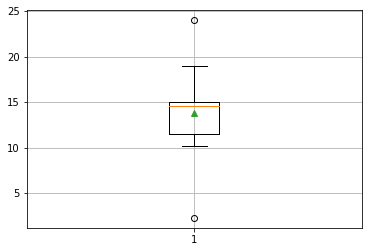

In [50]:
# Create box plot
plt.boxplot(arr, showmeans=True)
plt.grid()
plt.show()

## Standard Error

* With the data provided create a number of samples of house prices.
* Calculate the means for each sample.
* Calculate the standard error for each sample.
* Create a plot displaying the means for each sample, with the standard error as error bars.

In [59]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# Read data
housing_data = pd.read_csv("Resources/housing_data.csv", header=None)
housing_data = housing_data.sample(frac=1).reset_index(drop=True)

In [60]:
# Create a bunch of samples, each with div items
div = 20
lim = len(housing_data) // div
samples = [housing_data.iloc[(i * div):(i * div + div), 13]
           for i in range(0, lim)]

In [61]:
# Calculate means
means = [s.mean() for s in samples]
# Calculate standard error on means
sem = [s.sem() for s in samples]

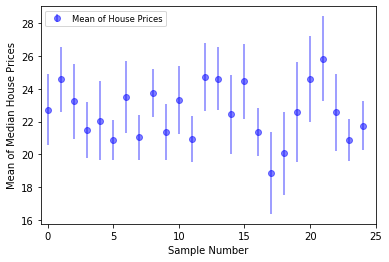

In [66]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b",
            alpha=0.5, label="Mean of House Prices")
ax.set_xlim(-0.5, len(means))
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Median House Prices")
plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.show()